<a href="https://colab.research.google.com/github/ShivaniMohite1/CODSOFT/blob/main/CodSoft_ML_Intern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT :- Machine Learning Internship**

**Task 2 :- Credit Card Fraud Detection**

In [1]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

#pip install plotly
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
fraudtrain = pd.read_csv('/content/fraudTrain.csv')

In [3]:
fraudtrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42826,42826,2019-01-26 15:08:27,3524574586339330,fraud_McKenzie-Huels,food_dining,28.37,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,b84678e05a1fe0423c27edd44c47a912,1.327591e+09,27.958330,-79.973208,0.0
42827,42827,2019-01-26 15:09:26,4364010865167176,fraud_Barton LLC,kids_pets,84.71,Gary,Martinez,M,03512 Jackson Ports,...,39.5483,-119.7957,276896.0,Immunologist,1997-03-12,0576985c3ab2858e0371085ab4dbb8f7,1.327591e+09,39.801946,-119.286741,0.0
42828,42828,2019-01-26 15:10:11,3576431665303017,fraud_Erdman-Durgan,health_fitness,134.53,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922.0,Contractor,1981-10-24,6e6fd83b78d11122c559036e9208b7e1,1.327591e+09,33.042530,-111.186488,0.0
42829,42829,2019-01-26 15:12:12,30238755902988,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,Danielle,Yu,F,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766.0,Press sub,1976-01-02,ab09218dab34d39e7ef174655b21a28c,1.327591e+09,31.461002,-96.868171,0.0


In [4]:
fraudtrain.shape

(42831, 23)

In [5]:
fraudtest = pd.read_csv('/content/fraudTest.csv')

In [6]:
fraudtest

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66110,66110,2020-07-13 23:48:48,4873783502705038,fraud_Hirthe-Beier,health_fitness,153.02,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871.0,Public house manager,1974-03-10,91a645c3a9631a2905f8fe3f62cf6697,1.373759e+09,49.042079,-122.345279,0.0
66111,66111,2020-07-13 23:48:55,3560797065840735,fraud_Eichmann-Kilback,home,12.21,Janet,Turner,F,0925 Lang Extensions,...,46.1838,-101.2589,77.0,Film/video editor,1989-12-17,11e5a494527fe853ab0baf7db0db508c,1.373759e+09,46.879255,-100.824101,0.0
66112,66112,2020-07-13 23:49:11,30011465039817,fraud_O'Connell-Ullrich,home,17.35,Lisa,Garcia,F,213 Gill Expressway,...,42.3496,-73.5873,4015.0,Human resources officer,1971-10-14,ff79216ebc6d0319cd9795a44d808446,1.373759e+09,42.592260,-73.604839,0.0
66113,66113,2020-07-13 23:49:38,4599285557366057,fraud_Rau-Grant,kids_pets,198.72,Mary,Williams,F,00315 Ashley Valleys,...,38.0261,-97.6666,1689.0,Gaffer,1997-11-18,398ea1f9001cf5169458e1c8d6bf3a42,1.373759e+09,38.795188,-97.457440,0.0


In [7]:
fraudtest.shape

(66115, 23)

In [8]:
df = pd.concat([fraudtrain,fraudtest],ignore_index = True)

In [9]:
df.shape

(108946, 23)

In [10]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,108946.000000,1.089460e+05,108946.000000,108945.000000,108945.000000,108945.000000,1.089440e+05,1.089440e+05,108944.000000,108944.000000,108944.000000
mean,28480.067373,4.145797e+17,70.043019,48707.563505,38.545465,-90.177825,8.922415e+04,1.354575e+09,38.543306,-90.179721,0.006141
std,17705.900145,1.305382e+18,146.688047,26895.944339,5.077876,13.774323,3.010898e+05,2.262916e+07,5.110670,13.785597,0.078122
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.646251,0.000000
25%,13618.000000,1.800429e+14,9.670000,26041.000000,34.668900,-96.790900,7.430000e+02,1.326729e+09,34.772470,-96.869608,0.000000
50%,27236.000000,3.519233e+15,47.390000,48088.000000,39.371600,-87.456900,2.443000e+03,1.372111e+09,39.367120,-87.365959,0.000000
75%,40854.000000,4.634956e+15,83.120000,72011.000000,41.940400,-80.158000,2.032800e+04,1.372992e+09,41.951538,-80.207079,0.000000
max,66114.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-12.000000,2.906700e+06,1.373759e+09,66.669356,-66.952352,1.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158.0,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1.325376e+09,40.653382,-76.152667,0.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691.0,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1.325376e+09,37.162705,-100.153370,0.0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018.0,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1.325376e+09,38.948089,-78.540296,0.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472.0,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1.325376e+09,40.351813,-79.958146,0.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785.0,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1.325376e+09,37.179198,-87.485381,0.0


In [13]:
df["age"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year-pd.DatetimeIndex(df["dob"]).year

<ipython-input-14-ce8b3664852a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=0.5, cmap = "Blues")


<Axes: >

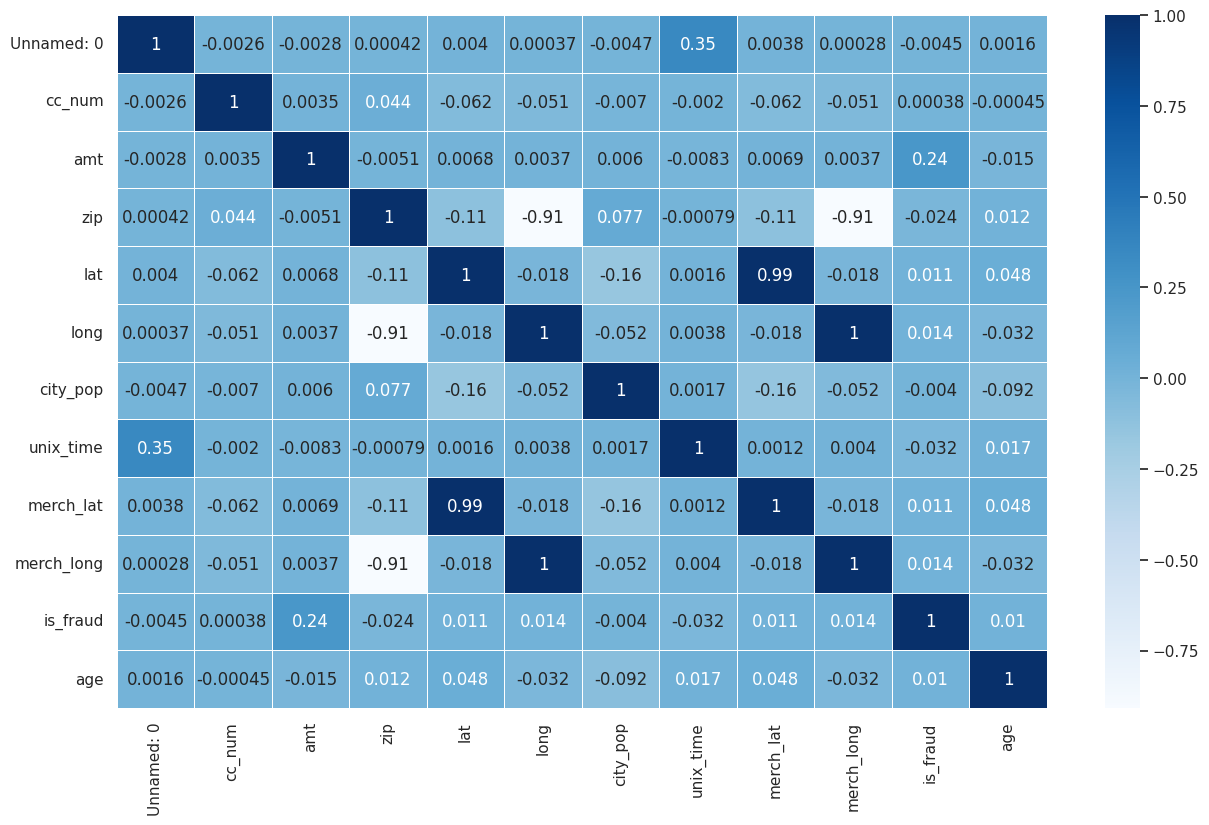

In [14]:
sns.heatmap(df.corr(),annot=True, linewidths=0.5, cmap = "Blues")

In [15]:
df["year"] = pd.DatetimeIndex(df["trans_date_trans_time"]).year.astype(int).astype(str)
df["hour"] = pd.DatetimeIndex(df["trans_date_trans_time"]).hour
df["month"] = pd.DatetimeIndex(df["trans_date_trans_time"]).month
df['dayofweek'] = pd.DatetimeIndex(df["trans_date_trans_time"]).dayofweek + 1
df["day"] = pd.DatetimeIndex(df["trans_date_trans_time"]).day
df = df.drop("trans_date_trans_time",1)

<ipython-input-15-1073c814568f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("trans_date_trans_time",1)


In [16]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,age,year,hour,month,dayofweek,day
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1.325376e+09,36.011293,-82.048315,0.0,31.0,2019,0,1,2,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1.325376e+09,49.159047,-118.186462,0.0,41.0,2019,0,1,2,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1.325376e+09,43.150704,-112.154481,0.0,57.0,2019,0,1,2,1
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1.325376e+09,47.034331,-112.561071,0.0,52.0,2019,0,1,2,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1.325376e+09,38.674999,-78.632459,0.0,33.0,2019,0,1,2,1


<Axes: xlabel='year', ylabel='count'>

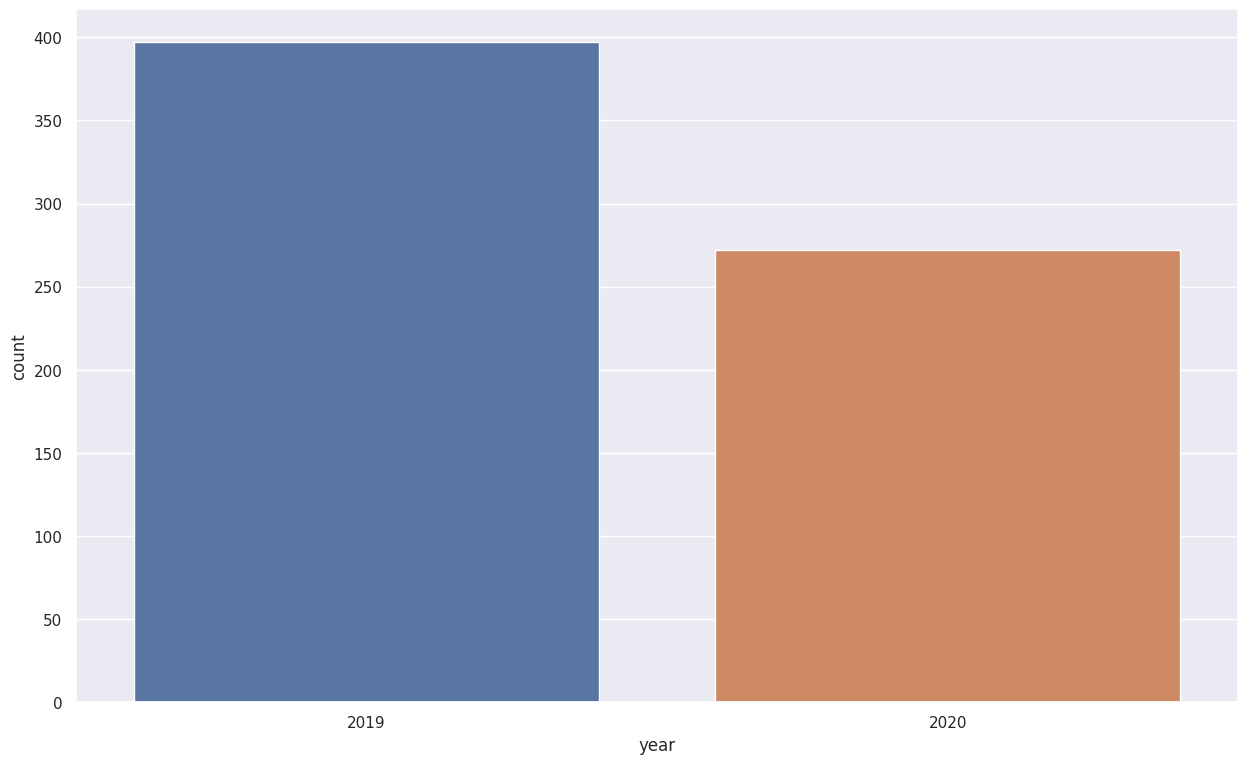

In [17]:
sns.countplot(x="year",data=df[df["is_fraud"]==1])

In [19]:
#Checking for percentage of fraud transactions from the is_fraud columns
count_0, count_1 = 0,0
for i in df["is_fraud"]:
    if i == 0:
        count_0+=1
    else:
        count_1+=1
print(count_1*100/count_0)

0.6197183098591549


In [21]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'year', 'hour', 'month', 'dayofweek', 'day'],
      dtype='object')

In [22]:
#Defining a bucket to categorize age into different age groups
def age_group(row):
    rows = row["age"]
    if rows <20:
        return "less than 20"
    elif rows >=20 and rows<30:
        return "20 to 30"
    elif rows >=30 and rows<40:
        return "30 to 40"
    elif rows >=40 and rows<50:
        return "40 to 50"
    elif rows >=50 and rows<60:
        return "50 to 60"
    elif rows >=60 and rows<70:
        return "60 to 70"
    elif rows >=70 and rows<80:
        return "70 to 80"
    elif rows >=80 and rows<90:
        return "80 to 90"
    else:
        return "greater than 90"
df["age_group"] = df.apply(age_group,axis=1)

In [23]:
#Dropping age and date of birth from the dataframe
df1 = df.drop(['age','dob'],1)

<ipython-input-23-c4d2c7a55afa>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop(['age','dob'],1)


In [24]:
df1.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,year,hour,month,dayofweek,day,age_group
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1.325376e+09,36.011293,-82.048315,0.0,2019,0,1,2,1,30 to 40
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1.325376e+09,49.159047,-118.186462,0.0,2019,0,1,2,1,40 to 50
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1.325376e+09,43.150704,-112.154481,0.0,2019,0,1,2,1,50 to 60
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1.325376e+09,47.034331,-112.561071,0.0,2019,0,1,2,1,50 to 60
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1.325376e+09,38.674999,-78.632459,0.0,2019,0,1,2,1,30 to 40


<Axes: xlabel='age_group', ylabel='count'>

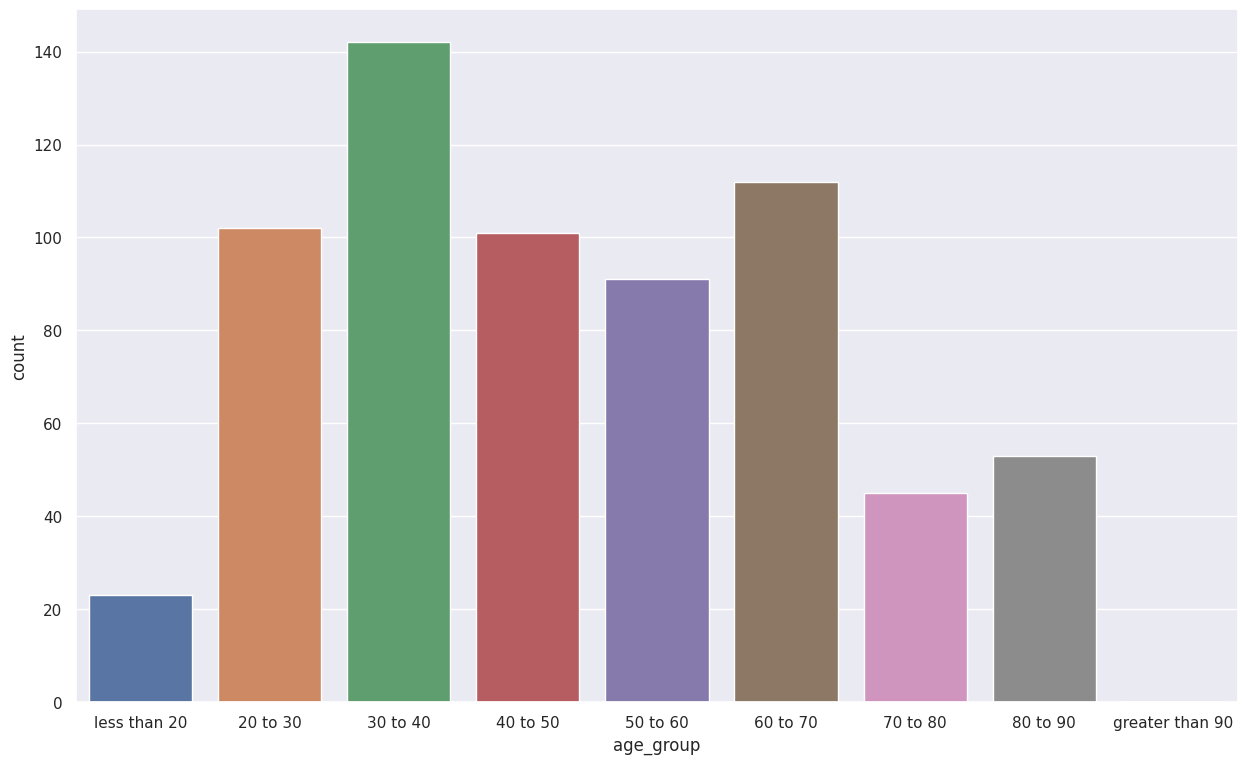

In [25]:
#Plotting fraud transactions for different age groups
order = ["less than 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80","80 to 90","greater than 90"]
sns.countplot(x="age_group",data=df1[df1["is_fraud"]==1], order = order)

<Axes: xlabel='gender', ylabel='count'>

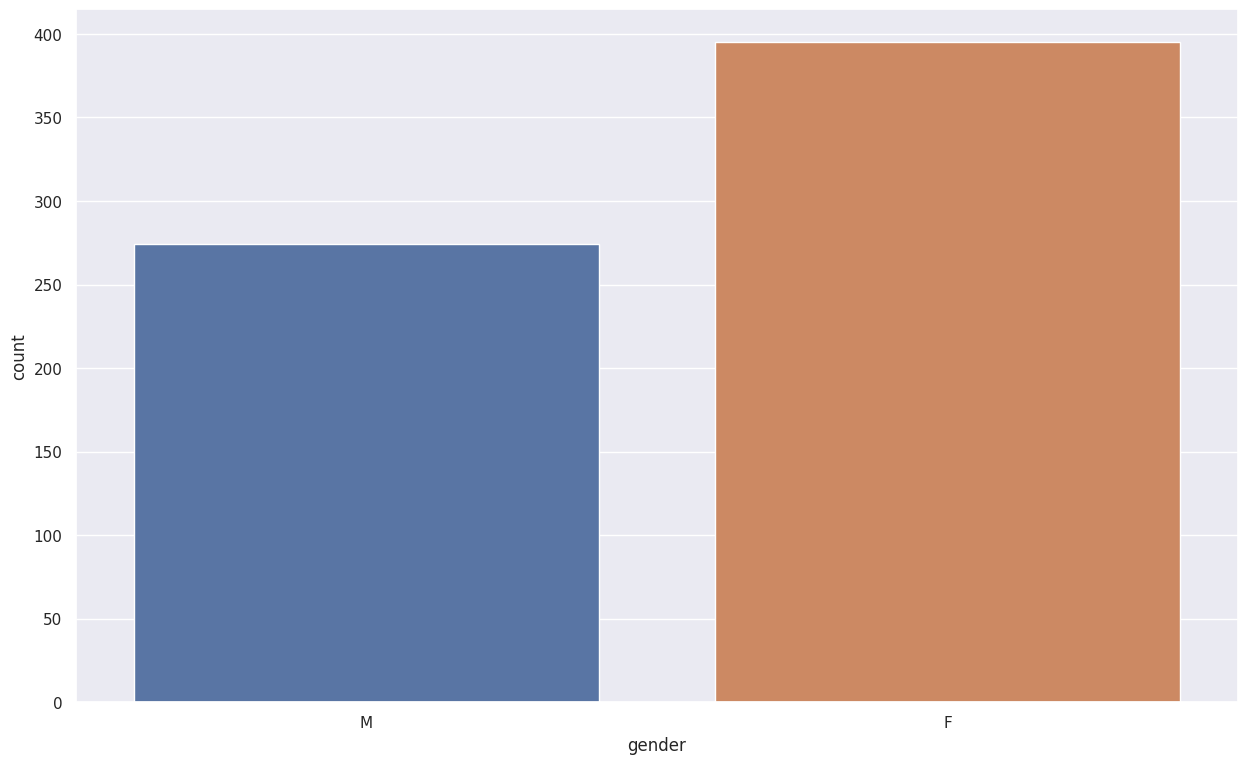

In [26]:
#Plotting fraud transactions with respect to gender
sns.countplot(x="gender",data=df1[df1["is_fraud"]==1])

<Axes: xlabel='state', ylabel='count'>

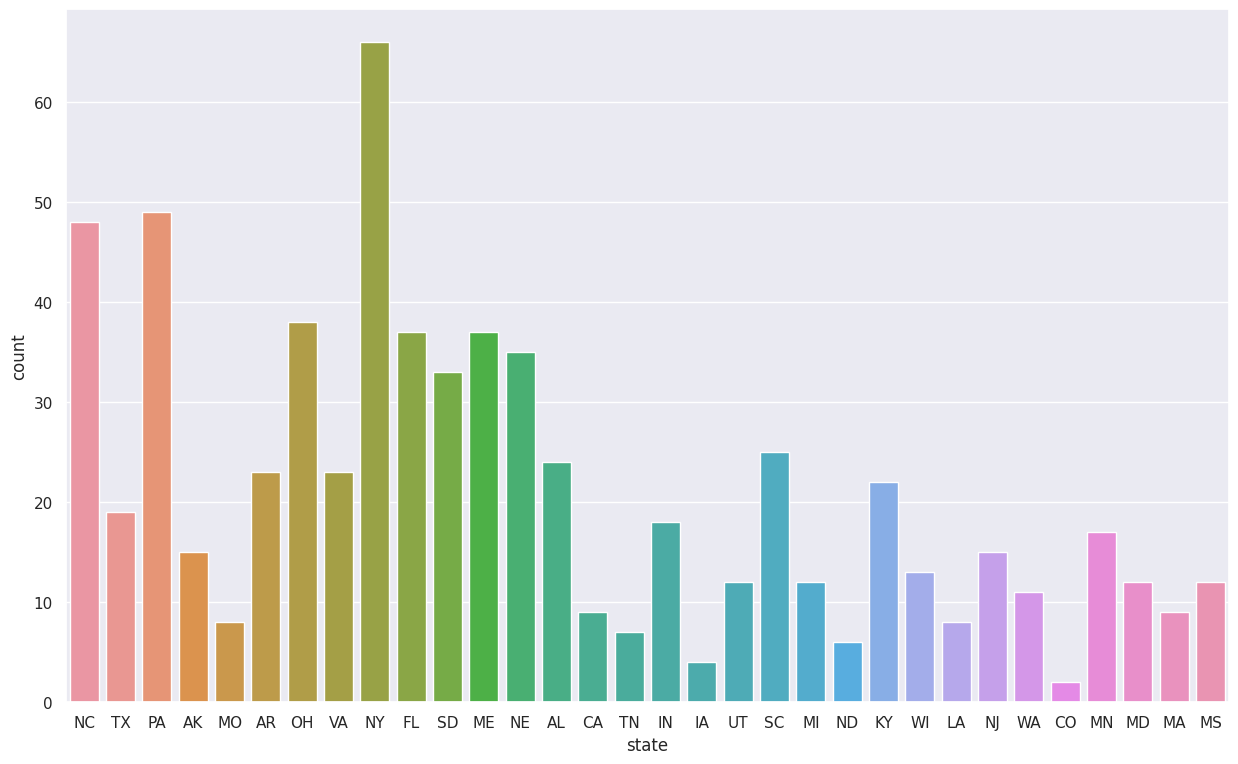

In [27]:
#Plotting fraud transactions with respect to states
sns.countplot(x="state",data=df1[df1["is_fraud"]==1])

<Axes: xlabel='hour', ylabel='count'>

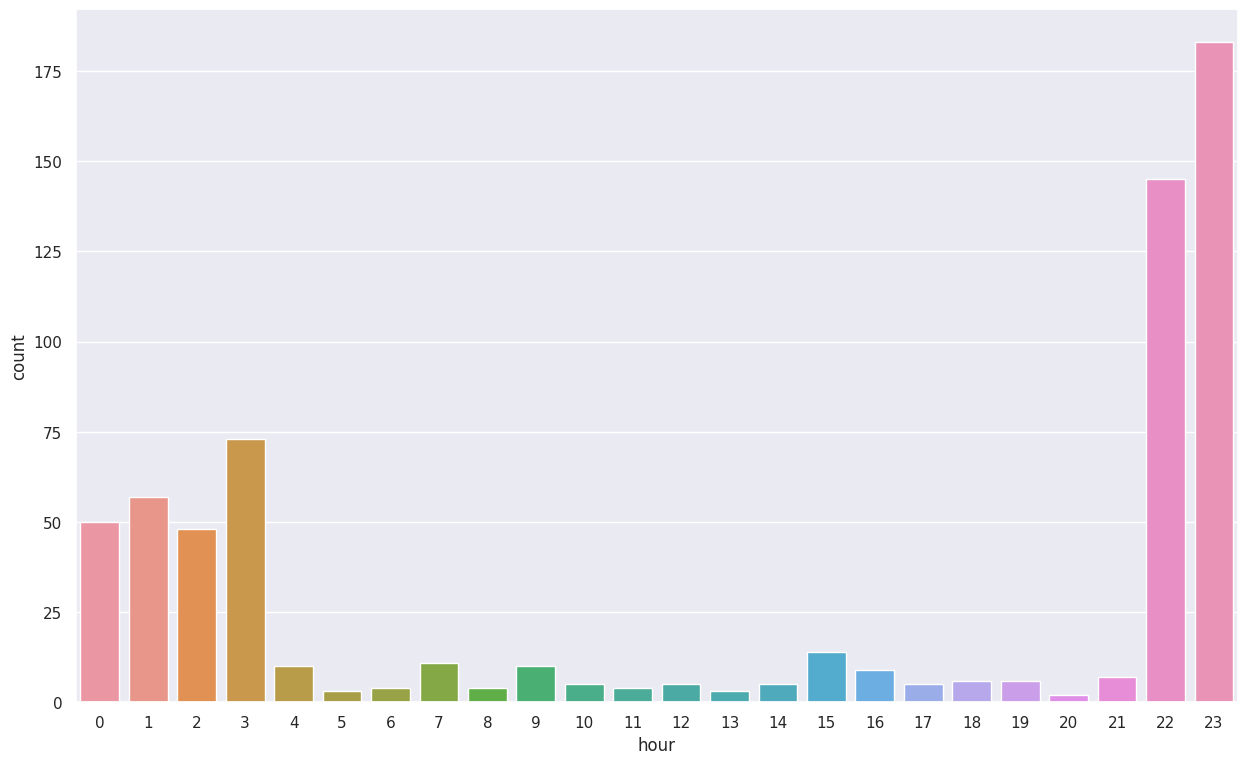

In [28]:
#Plotting fraud transactions with respect to the hour of day
sns.countplot(x="hour",data=df1[df1["is_fraud"]==1])

In [29]:
#Creating a dataframe consisting of state wise fraud transactions
df2 = df1.groupby(by="state").sum()["is_fraud"].to_frame()
df2.reset_index(inplace=True)
df2 = df2.rename(columns = {"state":"State","is_fraud":"Fraudulent Transactions"})
df2.head()

<ipython-input-29-38b357b6d48e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.groupby(by="state").sum()["is_fraud"].to_frame()


,State,Fraudulent Transactions
0,AK,15.0
1,AL,24.0
2,AR,23.0
3,AZ,0.0
4,CA,9.0


In [30]:
#This plot shows a geographical map of United States with different color schemes showing the intensity of fraud transactions that happened
fig = px.choropleth(df2,
                    locations='State',
                    color='Fraudulent Transactions',
                    locationmode='USA-states',
                    color_continuous_scale="picnic",
                    labels={'States':'Fraudulent transactions'},
                    scope='usa')
fig.add_scattergeo(
    locations=df2['State'],
    locationmode='USA-states',
    text=df2['State'],
    mode='text'
)
fig.show()

In [32]:
df1.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,year,hour,month,dayofweek,day,age_group
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1.325376e+09,36.011293,-82.048315,0.0,2019,0,1,2,1,30 to 40
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1.325376e+09,49.159047,-118.186462,0.0,2019,0,1,2,1,40 to 50
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1.325376e+09,43.150704,-112.154481,0.0,2019,0,1,2,1,50 to 60
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1.325376e+09,47.034331,-112.561071,0.0,2019,0,1,2,1,50 to 60
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1.325376e+09,38.674999,-78.632459,0.0,2019,0,1,2,1,30 to 40


In [33]:
#Calculating the distance between the merchant location and transaction location from the latitude and longitude values of each
df1["latitude_difference"] = abs(df1["lat"]-df1["merch_lat"])
df1["longitude_difference"] = abs(df1["long"]-df1["merch_long"])
df1["dist"] = np.sqrt(pow(df1["latitude_difference"]*110,2)+pow(df1["longitude_difference"]*110,2))

In [34]:
#Generating CSV files for Power BI implementation
df1.to_csv("main.csv",index=False)
df2.to_csv("states.csv",index=False)

In [35]:
#Dropping the columns
df1 = df1.drop(["lat","long","merch_lat","merch_long","latitude_difference","longitude_difference"],1)

<ipython-input-35-6156996bdc16>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [36]:
df1.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,is_fraud,year,hour,month,dayofweek,day,age_group,dist
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1.325376e+09,0.0,2019,0,1,2,1,30 to 40,96.011245
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1.325376e+09,0.0,2019,0,1,2,1,40 to 50,29.954105
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,0.0,2019,0,1,2,1,50 to 60,107.342986
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1.325376e+09,0.0,2019,0,1,2,1,50 to 60,101.178169
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,0.0,2019,0,1,2,1,30 to 40,95.535506


In [37]:
#Looking for unique values in data
df1.nunique()

Unnamed: 0     66115
cc_num           913
merchant         693
category          14
amt            21457
first            339
last             467
gender             2
street           913
city             840
state             50
zip              902
city_pop         825
job              476
trans_num     108944
unix_time     107208
is_fraud           2
year               2
hour              24
month              3
dayofweek          7
day               30
age_group          9
dist          108944
dtype: int64

In [38]:
#Dropping columns which dont contribute to the result
drop_cols = ["cc_num","merchant","first","last","street","trans_num","Unnamed: 0","city_pop","job","unix_time","trans_num","city","zip"]
df1 = df1.drop(columns = drop_cols,axis=1)

In [39]:
df1.head()
df1.size

1307352

In [40]:
#One hot encoding of data
df1_with_dummies = pd.concat([df1,pd.get_dummies(df1["gender"]),pd.get_dummies(df1["year"]),pd.get_dummies(df1["age_group"]),pd.get_dummies(df1["state"]),pd.get_dummies("category")],axis=1)
df1_with_dummies = df1_with_dummies.drop(["gender","age_group","state","year","category"],1)

<ipython-input-40-76d04e9f4c7f>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [41]:
#Looking at the encoded data
df1_with_dummies.head()

,amt,is_fraud,hour,month,dayofweek,day,dist,F,M,2019,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,0.0,0,1,2,1,96.011245,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0.0,0,1,2,1,29.954105,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0.0,0,1,2,1,107.342986,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0.0,0,1,2,1,101.178169,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0.0,0,1,2,1,95.535506,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [42]:
#Resampling the dataframe
not_fraud = df1_with_dummies[df1_with_dummies.is_fraud == 0]
fraud = df1_with_dummies[df1_with_dummies.is_fraud == 1]

oversample=resample(fraud, replace=True, n_samples=len(not_fraud), random_state=15)
balanced_df=pd.concat([not_fraud, oversample])

In [43]:
#Again checking the count of fraud transactions
count_0, count_1 = 0,0
for i in balanced_df["is_fraud"]:
    if i == 0:
        count_0+=1
    else:
        count_1+=1
print(count_1,count_0)

108275 108275


In [44]:
#Using test train split to split data into coordinates
X_train,X_test,y_train,y_test = train_test_split(balanced_df.drop(["is_fraud"],axis=1),balanced_df["is_fraud"],test_size=0.2,random_state=42)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((173240, 69), (43310, 69), (173240,), (43310,))

In [46]:
#Defining a generic function to implement models and returning data values
def model_implementation(model,X_train,X_test,y_train,y_test):
    if model == "LogisticRegression":
        model = "Logistic Regression"
        model_impl = LogisticRegression()
    elif model == "DecisionTree":
        model = "Decision Tree"
        model_impl = DecisionTreeClassifier(random_state=0, max_depth=2)
    elif model == "RandomForestClassifier":
        model = "Random Forest Classifier"
        model_impl = RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500)
    elif model == "GaussianNaiveBias":
        model = "Gaussian Naive Bias"
        model_impl = GaussianNB()
    model_impl.fit(X_train,y_train)
    pred_train=model_impl.predict(X_train)
    pred_test=model_impl.predict(X_test)

    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_test = accuracy_score(pred_test,y_test)
    confusionMatrix = confusion_matrix(y_test,pred_test)
    classificationReport = classification_report(y_test,pred_test)
    mae = mean_absolute_error(y_train,pred_train)
    print("Model Implemented: ", model)
    print("Accuracy on Training Set: ", accuracy_train)
    print('Accuracy on Validation Set: ', accuracy_test)
    print('Mean absolute error: ',mae)
    print('Confusion Matrix\n', confusionMatrix)
    print('Classification Report\n', classificationReport)

    return [accuracy_train,accuracy_test]

In [47]:
#Gaussian Naive Bias
model1= model_implementation("GaussianNaiveBias",X_train,X_test,y_train,y_test)

Model Implemented:  Gaussian Naive Bias
Accuracy on Training Set:  0.6221484645578388
Accuracy on Validation Set:  0.6263911336873701
Mean absolute error:  0.37785153544216116
Confusion Matrix
 [[ 5632 15975]
 [  206 21497]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.96      0.26      0.41     21607
         1.0       0.57      0.99      0.73     21703

    accuracy                           0.63     43310
   macro avg       0.77      0.63      0.57     43310
weighted avg       0.77      0.63      0.57     43310



In [48]:
#Logistic Regression
model2 = model_implementation("LogisticRegression",X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model Implemented:  Logistic Regression
Accuracy on Training Set:  0.842605633802817
Accuracy on Validation Set:  0.8449087970445625
Mean absolute error:  0.1573943661971831
Confusion Matrix
 [[19801  1806]
 [ 4911 16792]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.85     21607
         1.0       0.90      0.77      0.83     21703

    accuracy                           0.84     43310
   macro avg       0.85      0.85      0.84     43310
weighted avg       0.85      0.84      0.84     43310



In [49]:
#Decision Tree Classifier
model3 = model_implementation("DecisionTree",X_train,X_test,y_train,y_test)

Model Implemented:  Decision Tree
Accuracy on Training Set:  0.8703070884322327
Accuracy on Validation Set:  0.8749711383052413
Mean absolute error:  0.12969291156776727
Confusion Matrix
 [[18928  2679]
 [ 2736 18967]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     21607
         1.0       0.88      0.87      0.88     21703

    accuracy                           0.87     43310
   macro avg       0.87      0.87      0.87     43310
weighted avg       0.87      0.87      0.87     43310



In [51]:
#Random Forest Classifier
model4 = model_implementation("RandomForestClassifier",X_train,X_test,y_train,y_test)

Model Implemented:  Random Forest Classifier
Accuracy on Training Set:  0.940446779034865
Accuracy on Validation Set:  0.9435003463403371
Mean absolute error:  0.05955322096513507
Confusion Matrix
 [[20789   818]
 [ 1629 20074]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     21607
         1.0       0.96      0.92      0.94     21703

    accuracy                           0.94     43310
   macro avg       0.94      0.94      0.94     43310
weighted avg       0.94      0.94      0.94     43310



<Axes: >

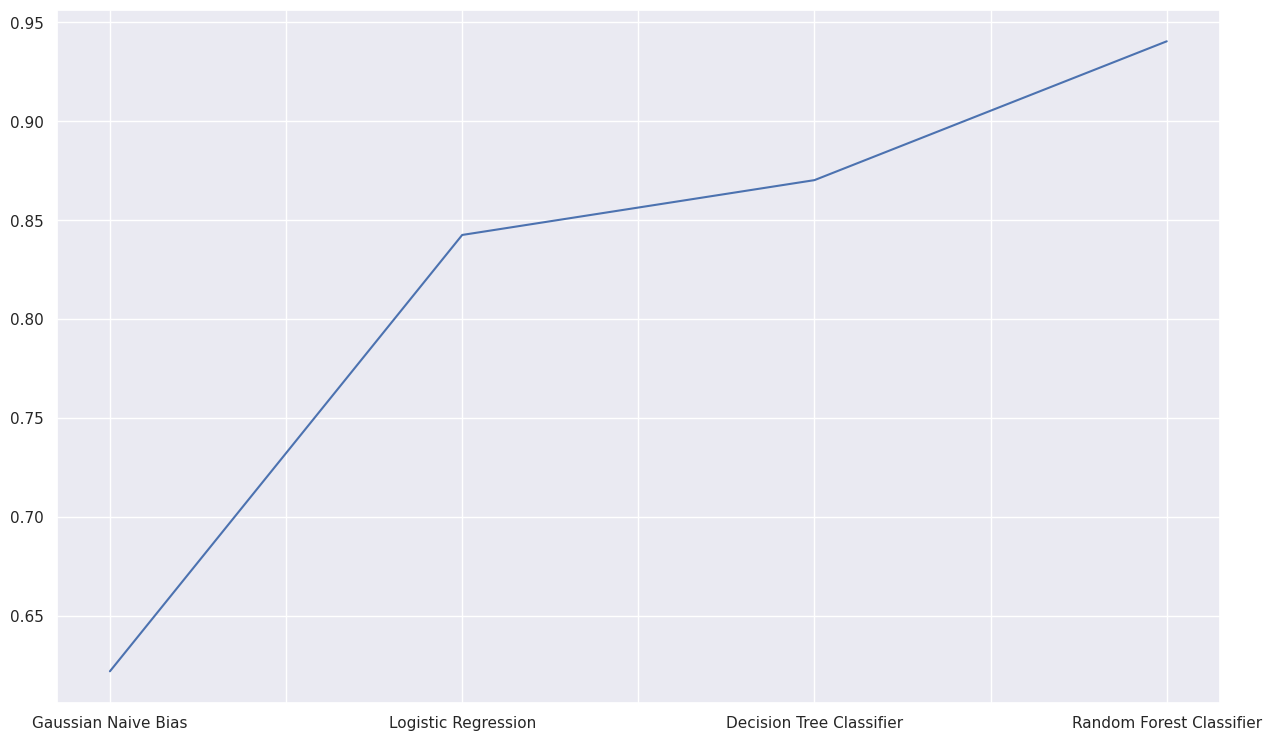

In [52]:
train_val = [model1[0],model2[0],model3[0],model4[0]]
index = ["Gaussian Naive Bias","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"]
training_acc = pd.Series(data=train_val,index=index)
training_acc.plot.line(x="Model Implementation",y="Accuracy in percentages")

<Axes: >

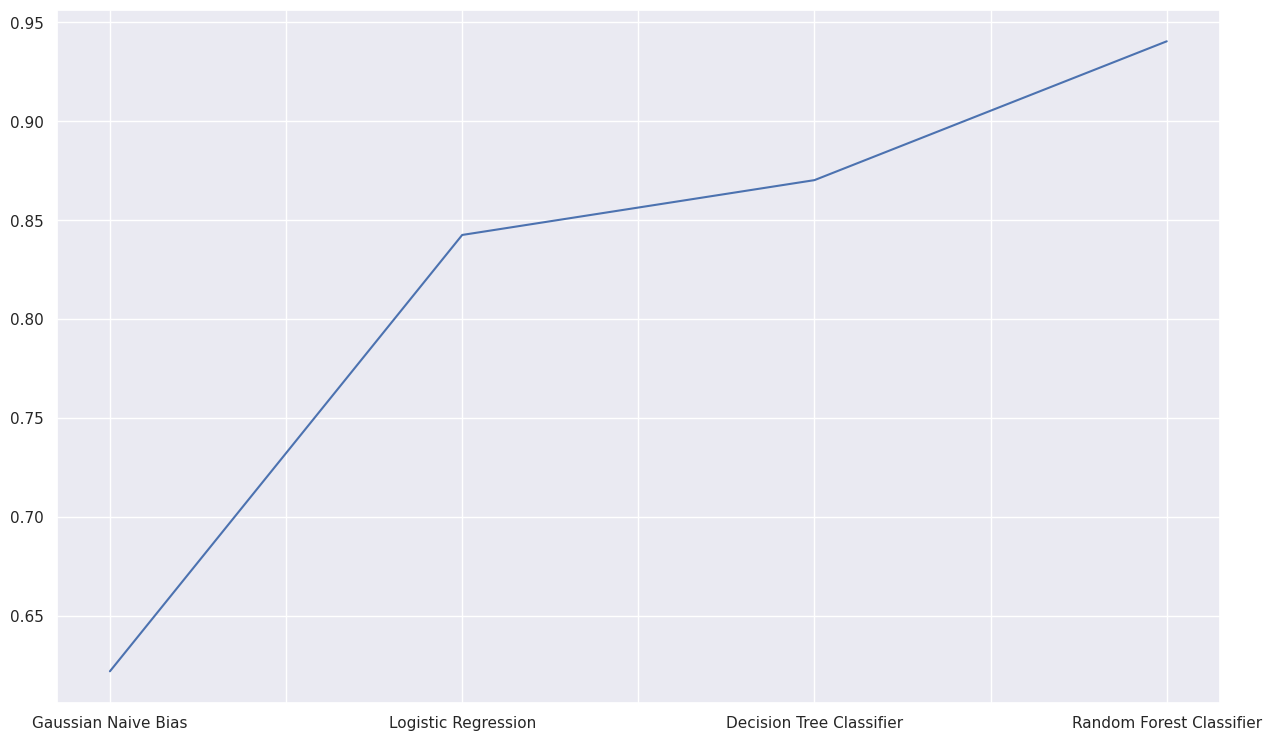

In [53]:
test_val = [model1[0],model2[0],model3[0],model4[0]]
index = ["Gaussian Naive Bias","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"]
testing_acc = pd.Series(data=test_val,index=index)
testing_acc.plot.line(x="Model Implementation",y="Accuracy in percentages")

**THANK YOU**